           Ticker Type  Quantity   Price  Fees Currency
Date                                                   
2021-09-30   ARKF  Buy         6   49.61     0      USD
2021-09-30   HTGC  Buy        25   15.16     5      USD
2021-09-30    IBB  Buy         4  155.91     0      USD
2021-09-30   KBWD  Buy        20   20.57     0      USD
2021-09-30    LIT  Buy         4   80.86     0      USD


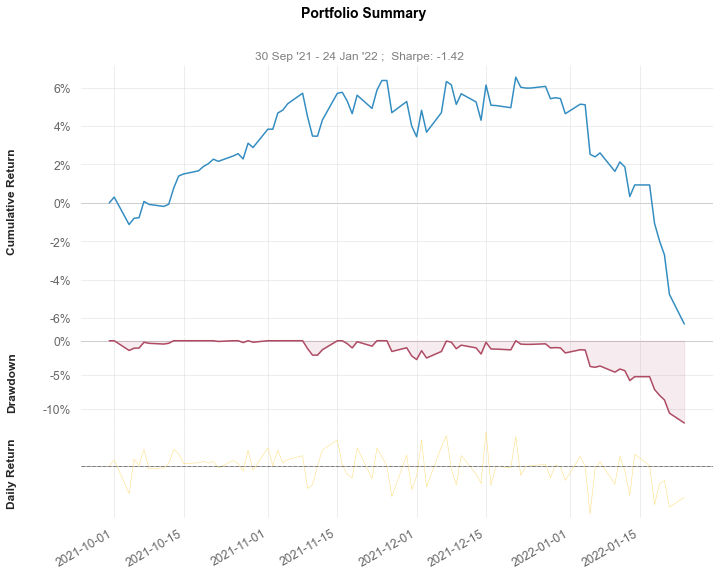

In [7]:
from portfolio import Portfolio
import quantstats as qs

ptf = Portfolio(account='tfsa', currency="CAD")

# Transactions
print(ptf._transaction_manager.transactions.head())
pnl = ptf.daily_total_pnl_pct(start_date=ptf.start_date).iloc[1:]

qs.plots.snapshot(pnl)